In [22]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

In [31]:
nPerClust = 100
blur = 1

#     x, y
A = [  1,  1] # centroid category 1
B = [  5,  1] # centroid category 2
C = [  3, -2] # centroid category 3

a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur ]

labels_np = np.vstack( ( np.zeros((nPerClust,1)), np.ones((nPerClust,1)), np.full((nPerClust,1), 2) ) )

data_np = np.hstack((a, b, c)).T

data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

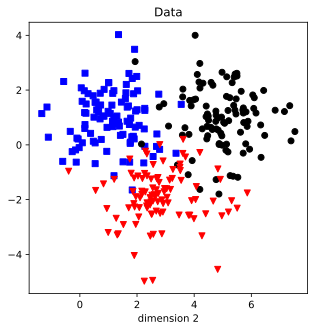

In [32]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1], 'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1], 'ko')
plt.plot(data[np.where(labels==2)[0], 0], data[np.where(labels==2)[0], 1], 'rv')
plt.title('Data')
plt.xlabel('dimension 1')
plt.xlabel('dimension 2')
plt.show()

In [33]:
ANNclassify = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4 ,3),
    nn.Softmax(dim=1)
)


lossfun = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(ANNclassify.parameters(), lr=0.01)

In [35]:
numepochs = 10000

losses = torch.zeros(numepochs)
ongoingAcc = []

for epochi in range(numepochs):

    # forward pass
    yHat = ANNclassify(data)

    # compute loss
    loss = lossfun(yHat, labels)
    losses[epochi] = loss

    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # compute accuracy
    matches = torch.argmax(yHat, axis=1) == labels # booleans (true/false)
    matchesNumaric = matches.float()               # convet to numaric
    accuracyPct = 100*torch.mean(matchesNumaric)   # calculate acc 
    ongoingAcc.append(accuracyPct)

# final forward pass
predictions = ANNclassify(data)

predLabels = torch.argmax(predictions, axis=1)
totalAcc = 100*torch.mean((predLabels == labels).float())

In [36]:
totalAcc

tensor(90.)

Final accuracy: 90%


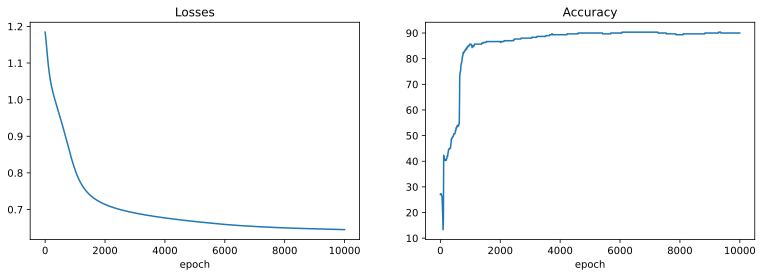

In [37]:
print( 'Final accuracy: %g%%' %totalAcc) 

fig, ax = plt.subplots (1, 2, figsize=(13, 4))

ax[0].plot(losses . detach()) 
ax[0].set_xlabel('LOSS' ) 
ax[0].set_xlabel( 'epoch' ) 
ax[0].set_title( ' Losses ' ) 

ax[1].plot(ongoingAcc) 
ax[1].set_xlabel( 'accuracy' ) 
ax[1].set_xlabel( 'epoch' ) 
ax[1].set_title( 'Accuracy' ) 
plt.show()

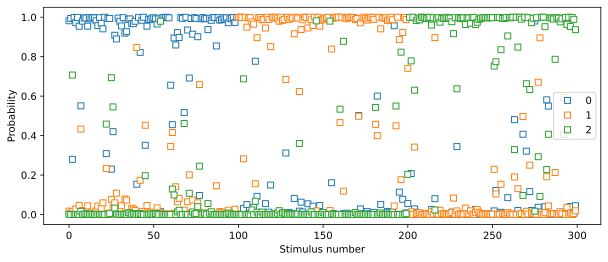

In [39]:
fig = plt.figure(figsize=(10, 4))
plt.plot(yHat.detach(), 's', markerfacecolor='w') 
plt.xlabel( 'Stimulus number' ) 
plt.ylabel( 'Probability' ) 
plt.legend(['0' , '1' , '2' ]) 
plt.show()

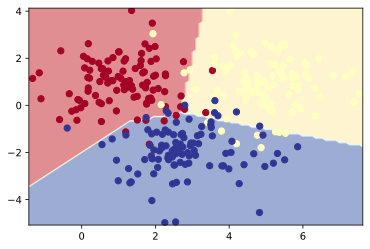

In [97]:

def plot_decision_boundary(model, X, y):

    steps = 100

    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = data[:, 0].min() - 0.1, data[:, 0].max() + 0.1
    y_min, y_max = data[:, 1].min() - 0.1, data[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, steps),
                        np.linspace(y_min, y_max, steps))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    x_in = torch.tensor(x_in).float()
    y_pred = ANNclassify(x_in)

    y_pred = np.argmax(y_pred.detach().numpy(), axis=1).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

plot_decision_boundary(ANNclassify, data, labels)